Found 0.05 in 2024-06-01T16:59-dynamic_48_0_05.txt
Found 0.4 in 2024-06-01T17:05-dynamic_48_0_4.txt
Found 0.8 in 2024-06-01T17:11-dynamic_48_0_8.txt
[19.11111111111111, 19.122222222222224, 22.166666666666668, 19.11111111111111, 20.566666666666666, 20.944444444444443, 22.266666666666666, 17.1, 10.622222222222222, 17.833333333333332, 17.566666666666666, 21.244444444444444, 13.422222222222222, 22.344444444444445, 21.633333333333333, 16.333333333333332, 16.055555555555557, 16.377777777777776, 18.91111111111111, 20.22222222222222, 13.844444444444445, 19.533333333333335, 18.11111111111111, 12.944444444444445, 20.988888888888887, 15.277777777777779, 15.277777777777779, 20.477777777777778, 16.377777777777776, 16.055555555555557, 20.511111111111113, 21.77777777777778, 20.57777777777778, 21.77777777777778, 19.533333333333335, 16.18888888888889, 18.988888888888887, 16.844444444444445, 19.11111111111111, 19.42222222222222, 15.177777777777777, 16.377777777777776, 20.244444444444444, 20.988888888888

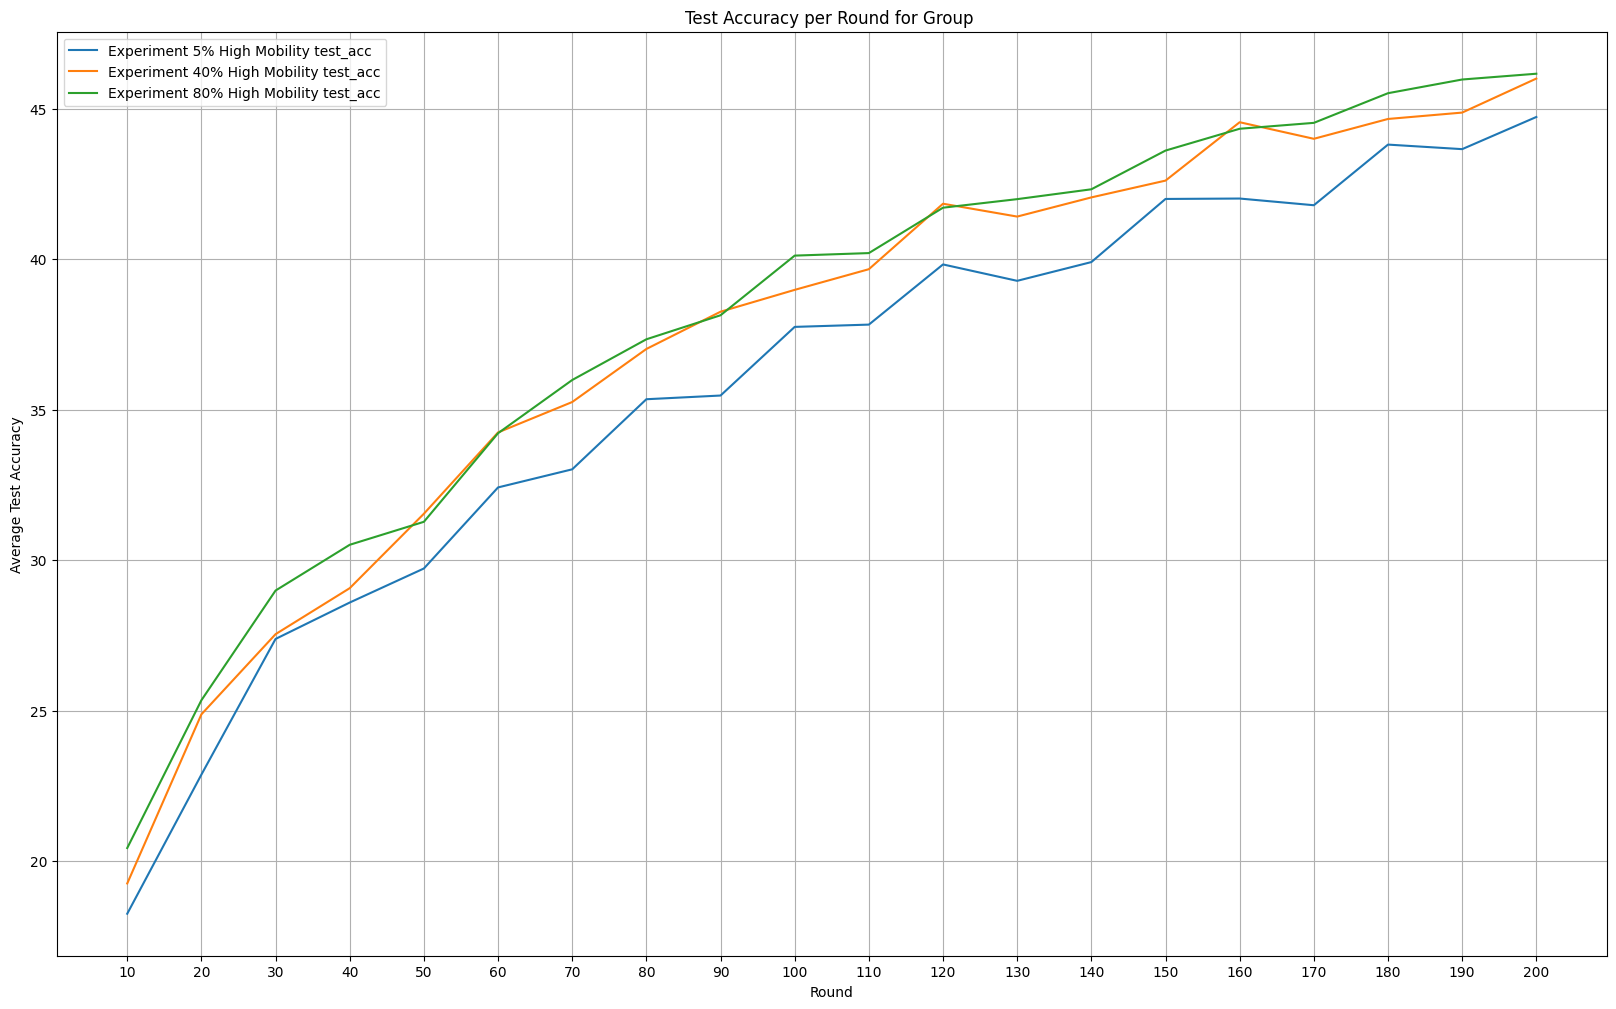

In [13]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

def find_data_dir_with_mobility(base_dir: str, mobility: float):
    mobility_str = str(mobility).replace(".", "_") + ".txt"
    for dir in os.listdir(base_dir):
        if mobility_str in dir:
            print(f"Found {mobility} in {dir}")
            return os.path.join(base_dir, dir, "machine0")
    
    print(f"Could not find mobility {mobility} in {base_dir}")
    raise ValueError

def inf_dict():
    return defaultdict(inf_dict)

num_nodes = 48
experiment_groups ={
    1: ".saved_experiments/preliminary",
    # 2: ".saved_experiments/2024-05-30-new-neighbours-2",
    # 3: ".saved_experiments/2024-05-30-new-neighbours-3",
}
experiments = {
    # 0.0: "0% High Mobility",
    0.05: "5% High Mobility",
    # 0.2: "20% High Mobility",
    0.4: "40% High Mobility",
    # 0.6: "60% High Mobility",
    0.8: "80% High Mobility",
    # 1.0: "100% High Mobility",
}
statistics = ["test_acc"]

def load_experiment_data(experiment_data, base_dir):
    for experiment, _ in experiments.items():
        experiment_data[experiment] = {}
        dir = find_data_dir_with_mobility(base_dir, experiment)
        for i in range(num_nodes):
            file_path = os.path.join(dir, f"{i}_results.json")
            if os.path.exists(file_path):
                with open(file_path, "r") as file:
                    content = json.load(file)

                    for statistic, rounds in content.items():
                        if statistic not in experiment_data[experiment]:
                            experiment_data[experiment][statistic] = {}

                        for round, value in rounds.items():
                            if round not in experiment_data[experiment][statistic]:
                                experiment_data[experiment][statistic][round] = []
                            experiment_data[experiment][statistic][round].append(value)

def compute_experiment_averages(experiment_data, statistics):
    averages = inf_dict()
    high_mobility_averages = inf_dict() 
    low_mobility_averages = inf_dict()
    for experiment in experiment_data:
        averages[experiment] = inf_dict()
        for statistic in statistics:
            for round, values in experiment_data[experiment][statistic].items():
                averages[experiment][statistic][round] = np.mean(values)

                if round == "10":
                    print(values)
                    print(len(values))

                high_mobility_proportion = experiment
                low_mobility_proportion = 1 - experiment
                high_mobility_averages[experiment][statistic][round] = average_of_first_percent(values, high_mobility_proportion)
                low_mobility_averages[experiment][statistic][round] = average_of_last_percent(values, low_mobility_proportion)
    return averages

def plot_averages(experiment_names, averages, experiment_group=""):
    plt.figure(figsize=(20, 12))

    for experiment, _ in averages.items():
        for statistic in statistics:
            rounds, acc_values = zip(*averages[experiment][statistic].items())
            plt.plot(rounds, acc_values, label=f"Experiment {experiment_names[experiment]} {statistic}")

    plt.xlabel("Round")
    plt.ylabel("Average Test Accuracy")
    plt.title(f"Test Accuracy per Round for Group {experiment_group}")
    plt.legend()
    plt.grid(True)
    plt.show()


grouped_experiments_data = inf_dict()
for experiment_group, dir in experiment_groups.items():
    experiment_data = grouped_experiments_data[experiment_group]
    load_experiment_data(experiment_data, dir)

grouped_averages = inf_dict()
for experiment_group, experiment_data in grouped_experiments_data.items():
    grouped_averages[experiment_group] = compute_experiment_averages(experiment_data, statistics)

for experiment_group, averages in grouped_averages.items():
    plot_averages(experiments, averages)


defaultdict(<function inf_dict at 0x147b0d6c0>, {0.05: defaultdict(<function inf_dict at 0x147b0d6c0>, {'test_acc': defaultdict(<function inf_dict at 0x147b0d6c0>, {'10': [18.249537037037037], '20': [22.871990740740742], '30': [27.380092592592593], '40': [28.590046296296293], '50': [29.7212962962963], '60': [32.41504629629629], '70': [33.016666666666666], '80': [35.34560185185185], '90': [35.468518518518515], '100': [37.74953703703704], '110': [37.82523148148148], '120': [39.82476851851852], '130': [39.27986111111111], '140': [39.90300925925926], '150': [42.00069444444444], '160': [42.014583333333334], '170': [41.79189814814815], '180': [43.80671296296296], '190': [43.65578703703704], '200': [44.72430555555555]})}), 0.4: defaultdict(<function inf_dict at 0x147b0d6c0>, {'test_acc': defaultdict(<function inf_dict at 0x147b0d6c0>, {'10': [19.255092592592593], '20': [24.874537037037033], '30': [27.538657407407403], '40': [29.06712962962963], '50': [31.540509259259263], '60': [34.2425925925

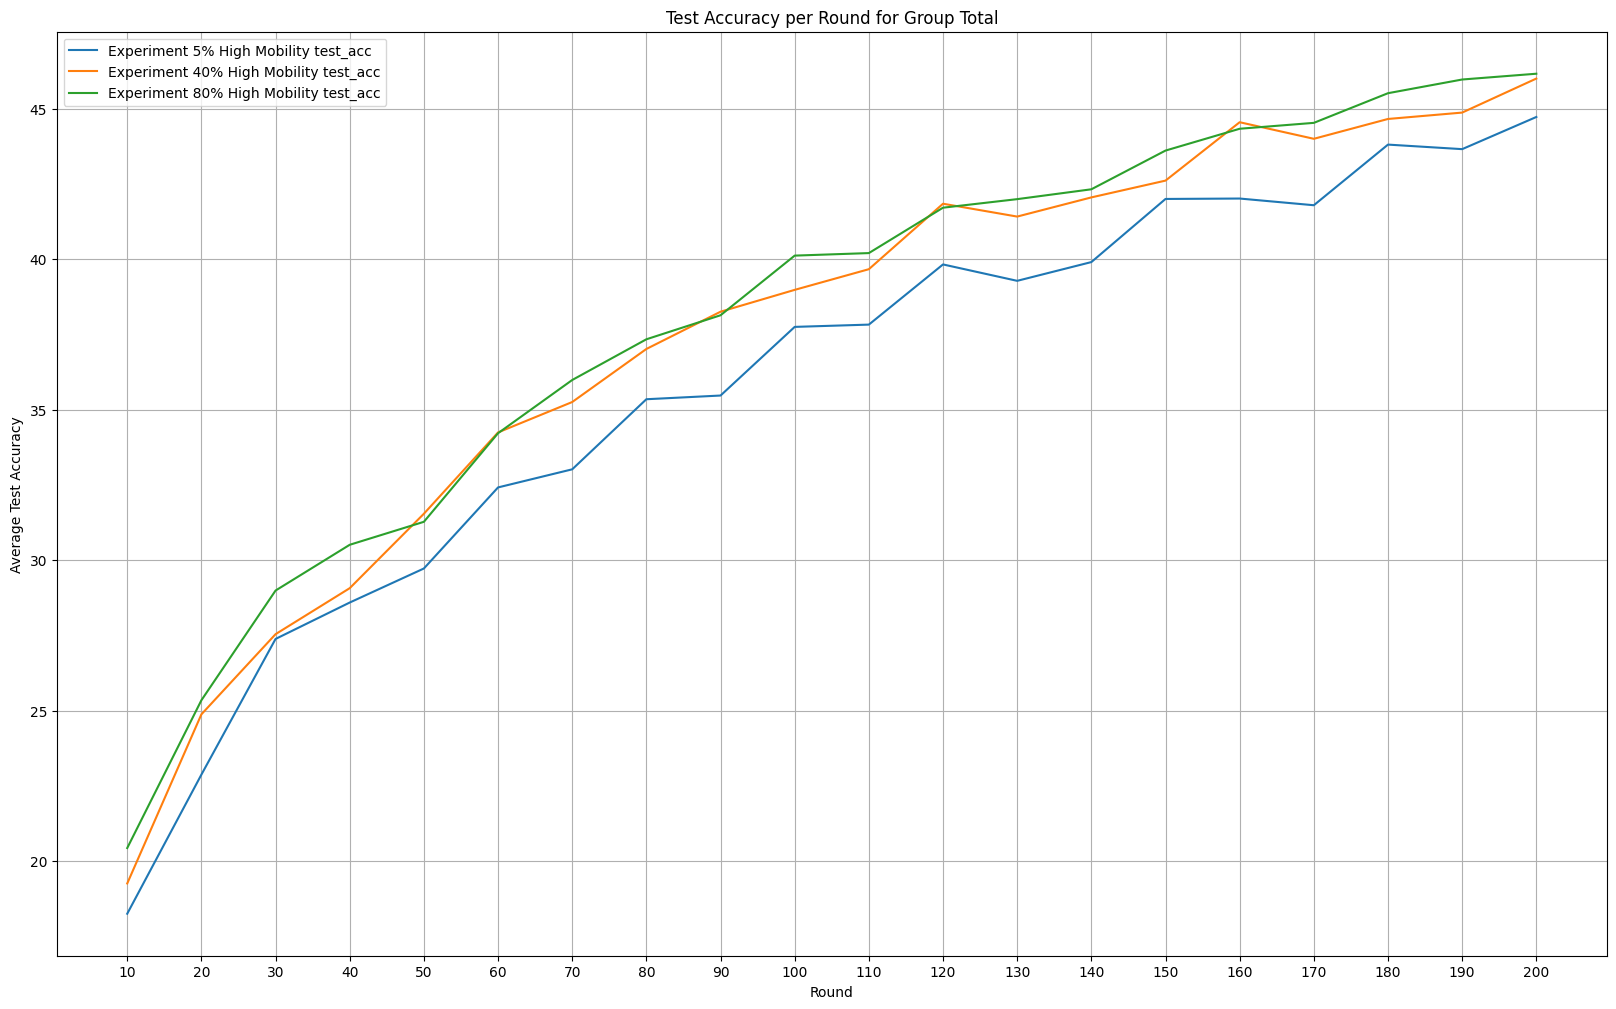

In [14]:
total_averages = inf_dict()

for experiment_group, averages in grouped_averages.items():
    for experiment, _ in averages.items():
        for statistic in statistics:
            for round, value in averages[experiment][statistic].items():
                if round not in total_averages[experiment][statistic]:
                    total_averages[experiment][statistic][round] = []
                total_averages[experiment][statistic][round].append(value)

print(total_averages)

for statistic in statistics:
    for experiment, _ in total_averages.items():
        for round, values in total_averages[experiment][statistic].items():
            total_averages[experiment][statistic][round] = np.mean(values)

plot_averages(experiments, total_averages, "Total")

In [15]:
plt.figure(figsize=(10, 6))

plot_averages(experiments, high_mobility_averages, 'high mobility clients')
plot_averages(experiments, low_mobility_averages, 'low mobility clients')

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'high_mobility_averages' is not defined

<Figure size 1000x600 with 0 Axes>